In [1]:
import matplotlib.pyplot as plt
import sklearn
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

C:\Users\Christine\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


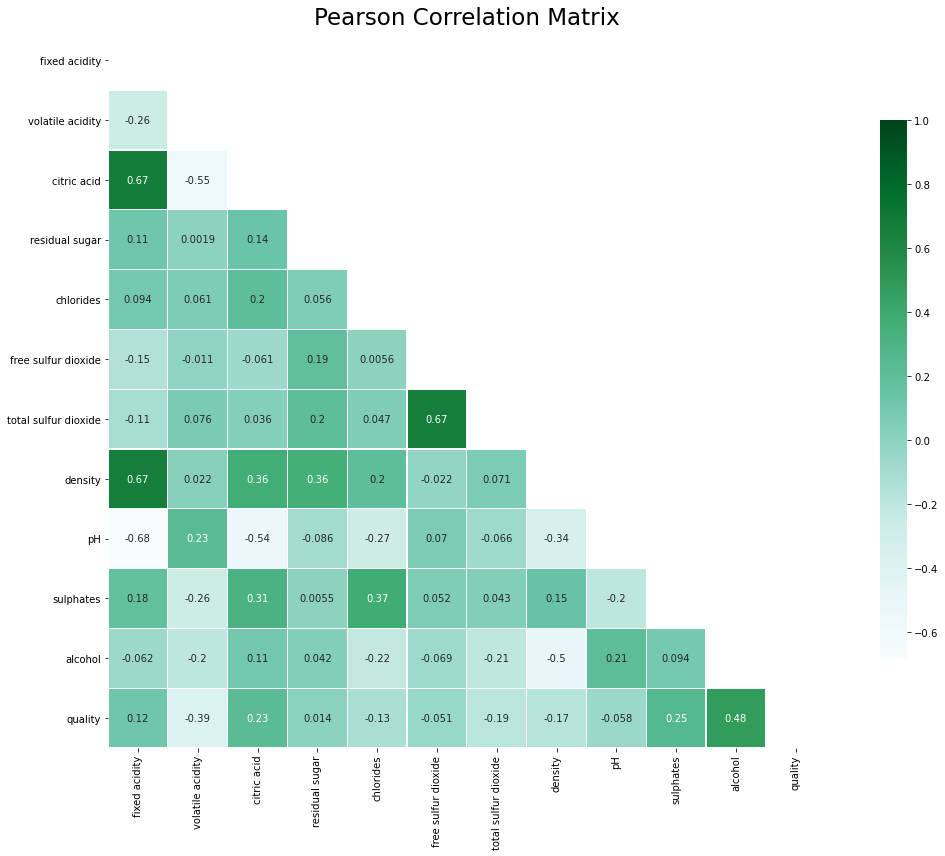

In [7]:
# create correlation matrix
mask = np.zeros_like(df[columns].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=23)

sns.heatmap(df[columns].corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

#most correlating columns with quality, volatile acidity is a negative correlation the others positive
features = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']

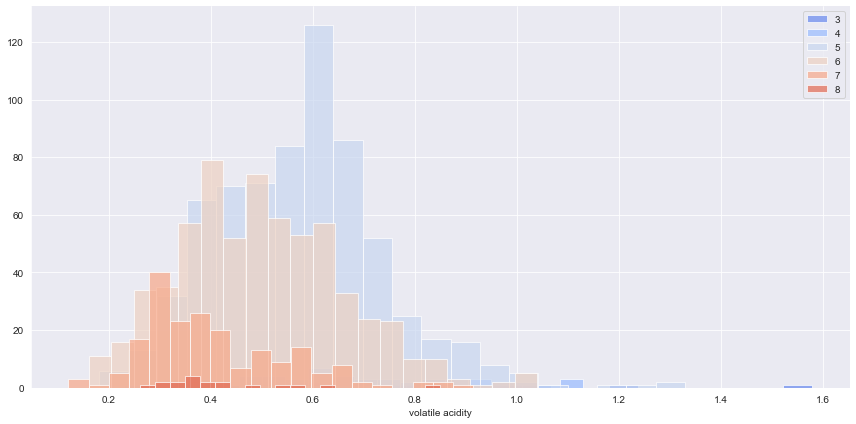

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'volatile acidity',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

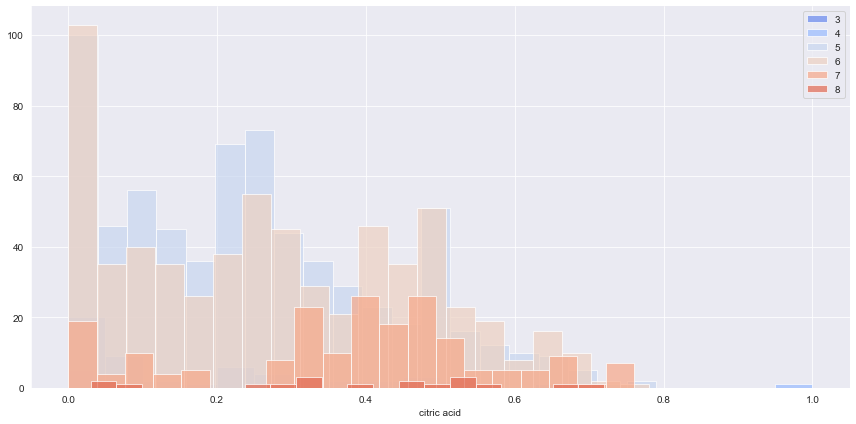

In [9]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'citric acid',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

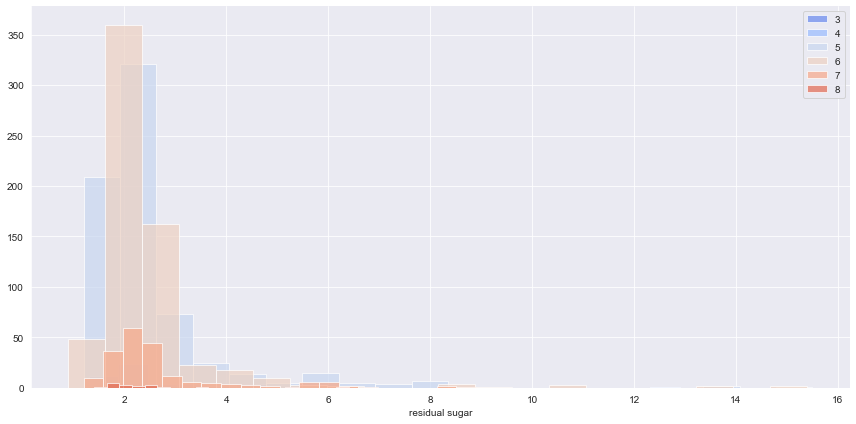

In [10]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'residual sugar',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

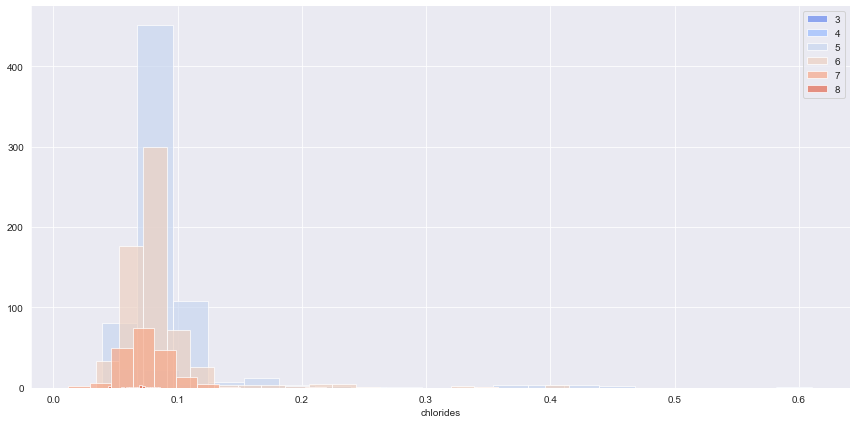

In [11]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'chlorides',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

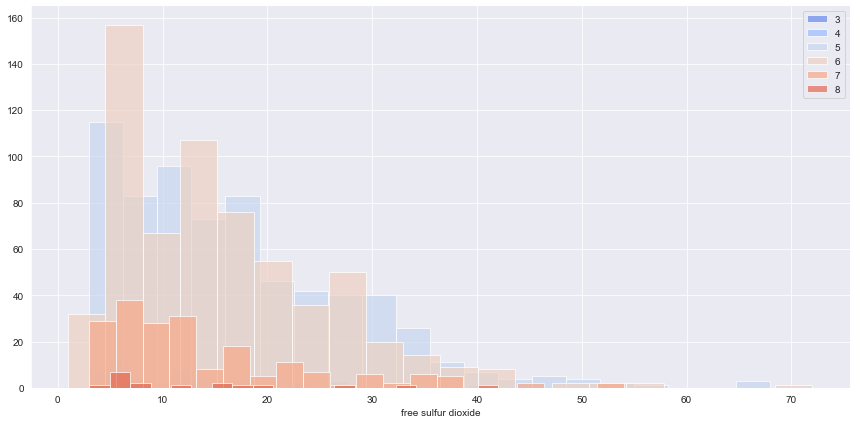

In [12]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'free sulfur dioxide',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

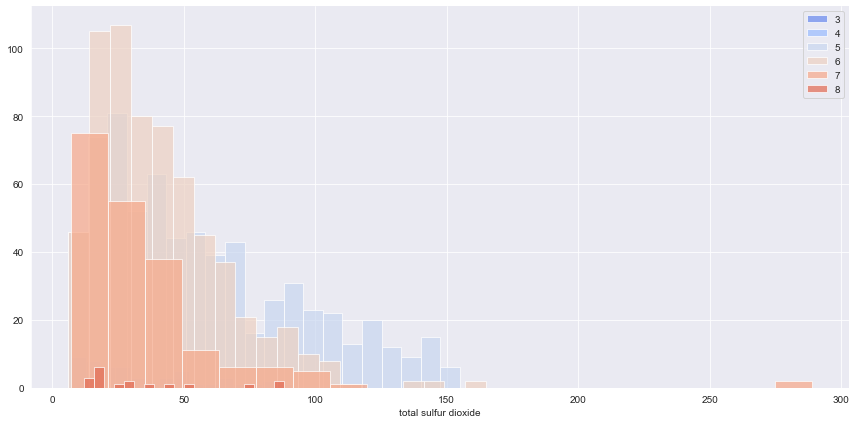

In [13]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'total sulfur dioxide',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

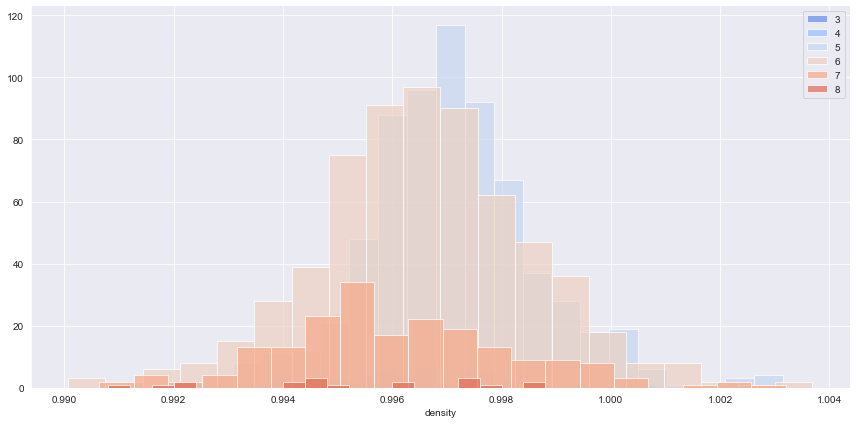

In [14]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'density',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

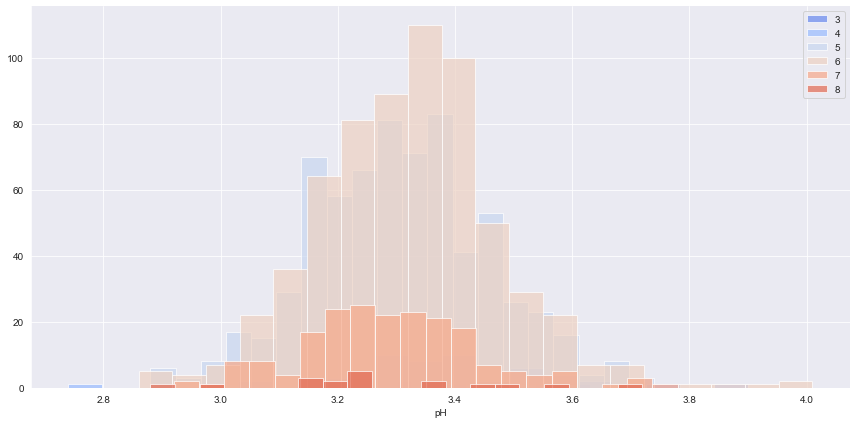

In [15]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'pH',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

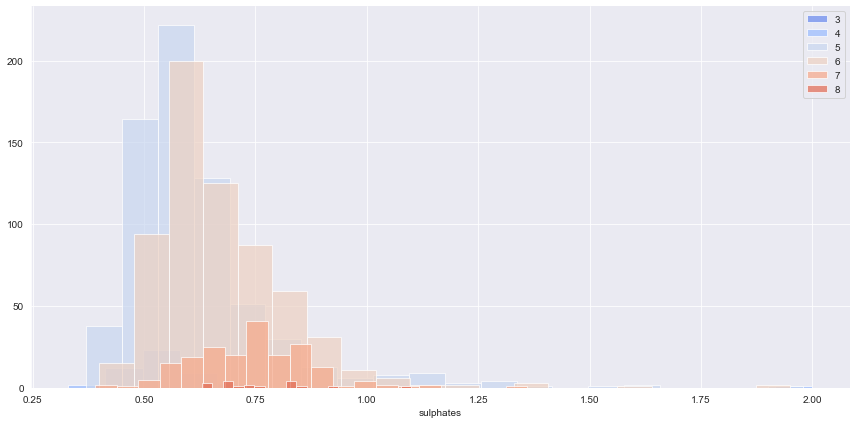

In [16]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'sulphates',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()

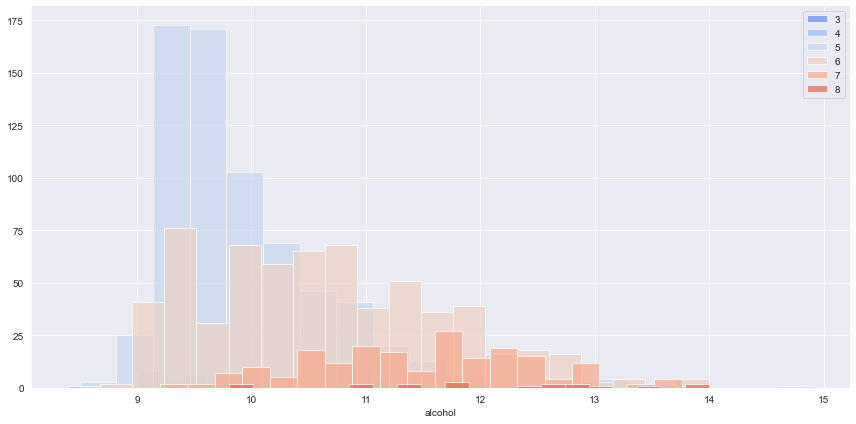

In [17]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="quality",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'alcohol',bins=20,alpha=0.7)
for ax in g.axes.ravel():
    ax.legend()